Ici, On entraine un modèle avec random forest pour comparer les résultats avec les autres modèles.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

dataset_path = r'/Users/alexd/Documents/etudes/M2/analyseImage/CMI/model/EuroSat_10Classes'

# Paramètres
batch_size = 32
img_height = 64
img_width = 64
validation_split = 0.2

# Prétraitement
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split
)

# Générateur pour les données d'entraînement
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Générateur pour les données de validation
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

/Users/alexd/Documents/etudes/M2/analyseImage/CMI/model/VirtualEnv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


In [3]:
# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrainement
X_train = []
y_train = []

num_images_to_process = 10000

processed_images = 0

for images, labels in train_generator:
    X_train.extend(images)
    y_train.extend(np.argmax(labels, axis=1))
    processed_images += len(images)
    if processed_images >= num_images_to_process:
        break

X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0], -1)

clf.fit(X_train, y_train)

# Validation

X_val = []
y_val = []

processed_images = 0

for images, labels in validation_generator:
    X_val.extend(images)
    y_val.extend(np.argmax(labels, axis=1))
    processed_images += len(images)
    if processed_images >= num_images_to_process:
        break

X_val = np.array(X_val)
X_val = X_val.reshape(X_val.shape[0], -1)


Accuracy: 0.6542765787370104


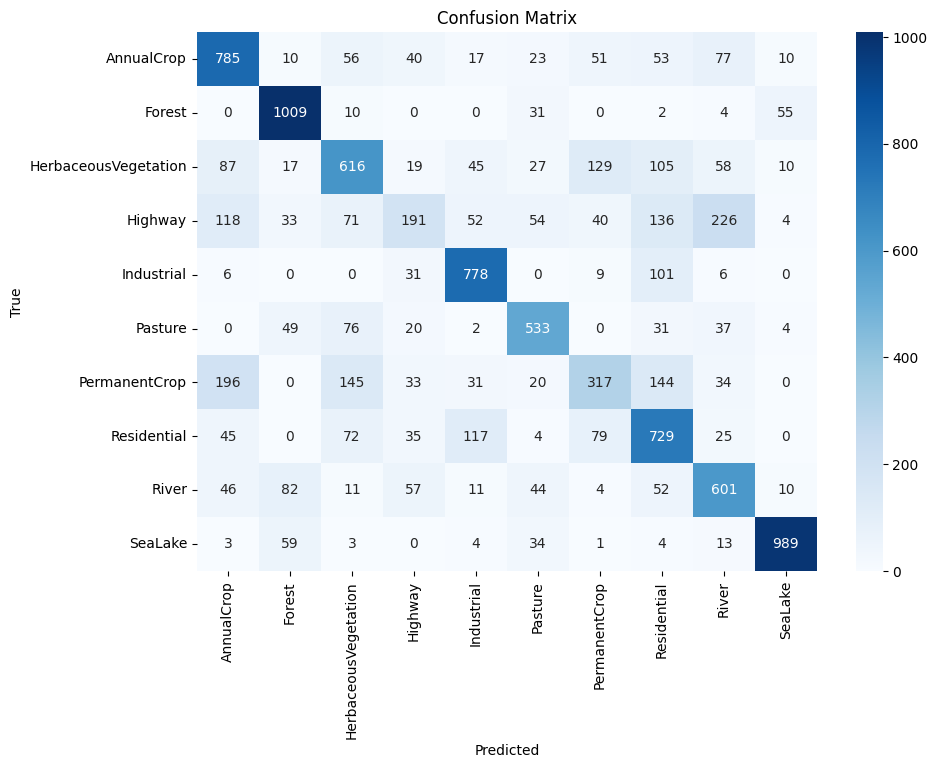

In [4]:
import seaborn as sns

class_names = train_generator.class_indices.keys()

y_pred = clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print("Accuracy:", accuracy)

# Confusion matrix
conf_mat = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()